## Index
* 1.2 [Load the data into the database.](#load-the-data)
    * 1.2.a [Loading data from song_data and log_data](#load-the-data-from-song_data-log_data)
        * 1.2.a.i [Loading data from song_data](#load-the-songdata)
        * 1.2.a.ii [Loading data from log_data](#load-the-logdata)
        * 1.2.a.iii [Minor adjustment to data](#adjust-the-data)
    * 1.2.b [Creating MYSQL/SQLITE3 DB Connection](#create-db-connection)
    * 1.2.c [Creating Tables](#create-tables)
    * 1.2.d [Dumping the data into the table](#create-tables)


* 1.3 [Answer the questions](#answer-the-questions)
    * 1.3.a [What time is the most popular time for staff to listen to music.](#1-3-a)
    * 1.3.b [Rank of Songs by Popularity](#1-3-b)
    * 1.3.c [Rank of Artists by Popularity](#1-3-c)
    * 1.3.d [Most popular artist/song per user](#1-3-d)



In [218]:
import glob
import os
import json

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## <a id="load-the-data">1.2 Load the data into the database.</a>


### <a id="load-the-data-from-song_data-log_data">1.2.a Loading data from song_data and log_data using pandas</a>


#### <a id="load-the-songdata">1.2.a.i Loading data from song_data</a>


* song_data folder follows directory structure where it has folder A and "A" itself has two more folders "A"(again) and "B". For now following folder paths are present
    * ```song_data/A/A```
    * ```song_data/A/B```

* Later on more folders can be added and more folder structure can be put in between for further segmentation of songs.

* To tackle this situation and not hardcoding the folder reading logic, best way is to go using glob with a ```simple regex``` pattern and ```recursive = True``` parameter.

In [220]:
#os.path.join keeps the path OS agnostic, it will work in Windows, Mac or Linux environment.
#pattern = "data", "song_data", "**", "*.json"
    # "**" highlights that we want to search in all folders at that level
    # "*.json" means we want all the files that match this name format for ex : 1.json, abc.json, zya1234.json all fall under this * regex
    # (It's a greedy matching operator)
    # recursive = True highlights that if there are multiple heirarchies of directories, we want to visit them all.
    # now out json reading is folder and name agnostic.
song_jpaths = glob.glob(os.path.join("data", "song_data", "**", "*.json"), recursive=True)
print(f"Total File Paths: {len(song_jpaths)}")

print(f"First two paths : {song_jpaths[:2]}")

Total File Paths: 71
First two paths : ['data/song_data/A/A/A/TRAAAEF128F4273421.json', 'data/song_data/A/A/A/TRAAARJ128F9320760.json']


* Now we have dir_path for each song json.

* Let's try to analyze one json first before deciding on how to load it.

Content of 'data/song_data/A/A/A/TRAAAEF128F4273421.json'
```json
{"num_songs": 1, "artist_id": "AR7G5I41187FB4CE6C", "artist_latitude": null, "artist_longitude": null, "artist_location": "London, England", "artist_name": "Adam Ant", "song_id": "SONHOTT12A8C13493C", "title": "Something Girls", "duration": 233.40363, "year": 1982}
```

* **Json File Structure** : Each Json file has only one row in it. We can load all the files as list of dictonaries and then load as pandas DataFrame.

In [221]:
songs_data = []
for s_jpath in song_jpaths:
    #Looping over each json_path
    #json.loads : loading it by json module to convert into dict
    data = json.loads(open(s_jpath).read())
    songs_data.append(data) #appending content of file as dict to songs

### What's a pandas dataframe? (Quick Refresher)
* Pandas Dataframe stores and manages Two-dimensional, size-mutable, potentially heterogeneous tabular data.
* It's one of the most commong tool for building ETL pipelines and doing EDA, Feature Engineering tasks.

In [222]:
##Loading as dataframe
original_song_df = pd.DataFrame(songs_data) 

In [223]:
#Checking the info of the songs.
original_song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num_songs         71 non-null     int64  
 1   artist_id         71 non-null     object 
 2   artist_latitude   31 non-null     float64
 3   artist_longitude  31 non-null     float64
 4   artist_location   71 non-null     object 
 5   artist_name       71 non-null     object 
 6   song_id           71 non-null     object 
 7   title             71 non-null     object 
 8   duration          71 non-null     float64
 9   year              71 non-null     int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 5.7+ KB


In [224]:
original_song_df.head()
#NaN is equivalent to null in pandas

,num_songs,artist_id,artist_latitude,artist_longitude,artist_location,artist_name,song_id,title,duration,year
0,1,AR7G5I41187FB4CE6C,NaN,NaN,"London, England",Adam Ant,SONHOTT12A8C13493C,Something Girls,233.40363,1982
1,1,AR8ZCNI1187B9A069B,NaN,NaN,,Planet P Project,SOIAZJW12AB01853F1,Pink World,269.81832,1984
2,1,ARXR32B1187FB57099,NaN,NaN,,Gob,SOFSOCN12A8C143F5D,Face the Ashes,209.60608,2007
3,1,AR10USD1187B99F3F1,NaN,NaN,"Burlington, Ontario, Canada",Tweeterfriendly Music,SOHKNRJ12A6701D1F8,Drop of Rain,189.57016,0
4,1,ARGSJW91187B9B1D6B,35.21962,-80.01955,North Carolina,JennyAnyKind,SOQHXMF12AB0182363,Young Boy Blues,218.77506,0


In [225]:
#Creating new directory consolidated_data if it already doesn't exists.
os.makedirs(os.path.join("consolidated_data"), exist_ok=True)

#saving dataframe as csv in consolidata_data directory
original_song_df.to_csv(os.path.join("consolidated_data", "songs.csv"), index=False)

#### <a id="load-the-logdata">1.2.a.ii Loading data from log_data</a>


* Let's perform the same set of operations for log_data as song_data.

In [226]:
logdata_json_paths = glob.glob(os.path.join("data", "log_data", "2018", "11", "*.json"))

print(f"Total log_data files : {len(logdata_json_paths)}")

print(f"First two log_data file paths : {logdata_json_paths[:2]}")

Total log_data files : 30
First two log_data file paths : ['data/log_data/2018/11/2018-11-11-events.json', 'data/log_data/2018/11/2018-11-23-events.json']


log_data is not as straight forward as songs_data.

Firs three rows of : ```data/log_data/2018/11/2018-11-11-events.json```
```json
{"artist":"Frumpies","auth":"Logged In","firstName":"Anabelle","gender":"F","itemInSession":0,"lastName":"Simpson","length":134.47791,"level":"free","location":"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","method":"PUT","page":"NextSong","registration":1541044398796.0,"sessionId":455,"song":"Fuck Kitty","status":200,"ts":1541903636796,"userAgent":"\"Mozilla\/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit\/537.36 (KHTML, like Gecko) Chrome\/36.0.1985.125 Safari\/537.36\"","userId":"69"}
{"artist":"Kenny G with Peabo Bryson","auth":"Logged In","firstName":"Anabelle","gender":"F","itemInSession":1,"lastName":"Simpson","length":264.75057,"level":"free","location":"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","method":"PUT","page":"NextSong","registration":1541044398796.0,"sessionId":455,"song":"By The Time This Night Is Over","status":200,"ts":1541903770796,"userAgent":"\"Mozilla\/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit\/537.36 (KHTML, like Gecko) Chrome\/36.0.1985.125 Safari\/537.36\"","userId":"69"}
{"artist":"Biffy Clyro","auth":"Logged In","firstName":"Anabelle","gender":"F","itemInSession":2,"lastName":"Simpson","length":189.83138,"level":"free","location":"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","method":"PUT","page":"NextSong","registration":1541044398796.0,"sessionId":455,"song":"God & Satan","status":200,"ts":1541904034796,"userAgent":"\"Mozilla\/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit\/537.36 (KHTML, like Gecko) Chrome\/36.0.1985.125 Safari\/537.36\"","userId":"69"}
```

* This structure is not directly json parasable.
    * Json needs the following format : list<dict> or dict<list> to be read directly via json.loads
    * We can read this with one short step:
        * Each file has multiple json dicts, however one line of every file is single json dict.

    * Instead of reading these files at once using ```.read()```, we will lines one by one(list<str>) using ```.readlines()```
    * Now we can converting this text-dict to dict using ```json.loads```



In [227]:
def get_one_json(json_path):
    with open(json_path, "r") as json_buffer:
        json_lines = json_buffer.readlines() #Reading one line as one string hence json_lines is list<str>
    return [json.loads(json_line) for json_line in json_lines] #loading each line as dict and return file as list<dict>

 
ld_dfs = [] #logdata_dataframes

for ld_json_path in logdata_json_paths:
    ld_json = get_one_json(ld_json_path) #ld_json is list<dict> for file @ ld_json_path
    ld_dfs.append(pd.DataFrame(ld_json))

In [228]:
original_log_df = pd.concat(ld_dfs) #We can combine multiple data_frames using pd.concat
original_log_df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Frumpies,Logged In,Anabelle,F,0,Simpson,134.47791,free,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",PUT,NextSong,1.541044e+12,455,Fuck Kitty,200,1541903636796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",69
1,Kenny G with Peabo Bryson,Logged In,Anabelle,F,1,Simpson,264.75057,free,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",PUT,NextSong,1.541044e+12,455,By The Time This Night Is Over,200,1541903770796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",69
2,Biffy Clyro,Logged In,Anabelle,F,2,Simpson,189.83138,free,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",PUT,NextSong,1.541044e+12,455,God & Satan,200,1541904034796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",69
3,None,Logged In,Lily,F,0,Burns,NaN,free,"New York-Newark-Jersey City, NY-NJ-PA",GET,Home,1.540621e+12,456,None,200,1541910841796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",32
4,HIM,Logged In,Lily,F,1,Burns,212.06159,free,"New York-Newark-Jersey City, NY-NJ-PA",PUT,NextSong,1.540621e+12,456,Beautiful,200,1541910973796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",32


In [229]:
original_log_df.to_csv(os.path.join("consolidated_data", "logs.csv"), index=False)

### Anomalies in Data

* I went through the csv and found the artist and song to be None at some places in log csv.

In [230]:
original_log_df[original_log_df["auth"] == "Logged Out"]

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
19,None,Logged Out,None,None,8,None,NaN,free,None,GET,Home,NaN,437,None,200,1541933298796,None,
20,None,Logged Out,None,None,9,None,NaN,free,None,GET,Home,NaN,437,None,200,1541934031796,None,
21,None,Logged Out,None,None,10,None,NaN,free,None,PUT,Login,NaN,437,None,307,1541934032796,None,
18,None,Logged Out,None,None,4,None,NaN,paid,None,GET,Home,NaN,821,None,200,1542937172796,None,
19,None,Logged Out,None,None,5,None,NaN,paid,None,GET,About,NaN,821,None,200,1542937234796,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,None,Logged Out,None,None,47,None,NaN,paid,None,GET,About,NaN,564,None,200,1543069852796,None,
229,None,Logged Out,None,None,0,None,NaN,paid,None,GET,Home,NaN,849,None,200,1543070670796,None,
230,None,Logged Out,None,None,1,None,NaN,paid,None,PUT,Login,NaN,849,None,307,1543070671796,None,
299,None,Logged Out,None,None,13,None,NaN,paid,None,GET,Home,NaN,910,None,200,1543079836796,None,


#### <a id="adjust-the-data">1.2.a.iii Minor Adjustments to Data</a>

#### Having artist and song names is crucial for our following ETL Steps.

    * Calculating most popular song and artist can be completely correct with null/Nan/None values present.

In [231]:
artist_rows = original_log_df["artist"].notna() #Selecting rows where artist column has NA values.
song_rows = original_log_df["song"].notna() #Selecting rows where song column has NA values.

original_log_df = original_log_df[(artist_rows | song_rows)] 

In [232]:
original_log_df.shape

(6820, 18)

In [233]:
original_log_df.to_csv(os.path.join("consolidated_data", "logs.csv"), index=False)

### <a id="create-db-connection">1.2.b Creating MYSQL/SQLITE3 DB Connection</a>


In [234]:
import sqlite3
import mysql.connector

try:
    conn = mysql.connector.connect(host="localhost", user="root", database="contactout")
    print("Connection Established to MYSQL")
    cursor = conn.cursor()
except:
    print("Failed to create connection to MYSQL")
    print("Creating connection to local sqlite db.")
    cursor = sqlite3.connect(os.path.join("db", "contactout.db"))
    print("Connection Established to SQLite3")


Connection Established to MYSQL


### <a id="create-tables">1.2.c Creating the tables</a>

In [235]:
cursor.execute('''CREATE TABLE `contactout`.`logs` (
  `artist` text,
  `auth` varchar(255),
  `firstName` text,
  `gender` varchar(255),
  `iteminSession` int,
  `lastName` text,
  `length` float,
  `level` varchar(255),
  `location` text,
  `method` varchar(255),
  `page` varchar(255),
  `registration` varchar(255),
  `sessionId` int,
  `song` text,
  `status` int,
  `ts` float,
  `userAgent` text,
  `userId` int
);''')

print("logs table created successfully.")


logs table created successfully.


In [236]:
cursor.execute('''CREATE TABLE `contactout`.`songs` (
  `num_songs` int,
  `artist_id` text,
  `artist_latitude` float,
  `artist_longitude` float,
  `artist_location` text,
  `artist_name` text,
  `song_id` text,
  `title` text,
  `duration` float,
  `year` int
);''')

print("songs table created successfully.")

songs table created successfully.


### <a id="create-tables">1.2.d Dumping the data into the table.</a>

In [237]:
#Inserting to log_data table
data_rows = original_log_df.values.tolist()
cursor.executemany("INSERT INTO logs VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);", data_rows)
conn.commit()

print("All rows added to table logs successfully.")

All rows added to table logs successfully.


In [238]:
#Inserting to log_data table

original_song_df["artist_longitude"] = original_song_df["artist_longitude"].fillna(0)
original_song_df["artist_latitude"] = original_song_df["artist_latitude"].fillna(0)

data_rows = original_song_df.values.tolist()

cursor.executemany("INSERT INTO songs VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);", data_rows)
conn.commit()

print("All rows added to table songs successfully.")

All rows added to table songs successfully.


## <a id="answer-the-questions">1.3 **Answer the questions:**</a>
* #### 1.3.a What time is most popular for staff to listen to music
* #### 1.3.b Rank of songs by popularity
* #### 1.3.c Rank of artists by popularity
* #### 1.3.d Most popular song & artist per user


In [239]:
#Making deep copy of original dataframes to make sure we have backup at any moment.
song_df = original_song_df.copy(deep = True)
log_df = original_log_df.copy(deep = True)

In [240]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num_songs         71 non-null     int64  
 1   artist_id         71 non-null     object 
 2   artist_latitude   71 non-null     float64
 3   artist_longitude  71 non-null     float64
 4   artist_location   71 non-null     object 
 5   artist_name       71 non-null     object 
 6   song_id           71 non-null     object 
 7   title             71 non-null     object 
 8   duration          71 non-null     float64
 9   year              71 non-null     int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 5.7+ KB


In [241]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6820 entries, 0 to 357
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   artist         6820 non-null   object 
 1   auth           6820 non-null   object 
 2   firstName      6820 non-null   object 
 3   gender         6820 non-null   object 
 4   itemInSession  6820 non-null   int64  
 5   lastName       6820 non-null   object 
 6   length         6820 non-null   float64
 7   level          6820 non-null   object 
 8   location       6820 non-null   object 
 9   method         6820 non-null   object 
 10  page           6820 non-null   object 
 11  registration   6820 non-null   float64
 12  sessionId      6820 non-null   int64  
 13  song           6820 non-null   object 
 14  status         6820 non-null   int64  
 15  ts             6820 non-null   int64  
 16  userAgent      6820 non-null   object 
 17  userId         6820 non-null   object 
dtypes: float6

### <a id="1-3-a">**1.3.a What time is the most popular time for staff to listen to music.**</a>

#### Converting epoch to timestamp

* There are two ways to convert epoch to timestamp
    * Convert to all s, ms and ns and then figure out which is the most sensible time. In our case,
        * unit = "s" : will throw error
        * unit = "ms" : resolves in the year 2018
        * unit = "ns" : resolves to year 1970s
    * By looking at the json-file names then ms makes the most sense.

    * Since the timestamp is 13 digit only, there is a very high chance it belongs to ms but assumption is not generally adviced, similar assumptions lead to crash of Mars Meteorological Orbiter

In [242]:
timestamp_s = pd.to_datetime(log_df["ts"], unit = "s")
timestamp_s.head()

OutOfBoundsDatetime: cannot convert input with unit 's'

In [243]:
timestamp_ms = pd.to_datetime(log_df["ts"], unit = "ms")
timestamp_ms.head()

0   2018-11-11 02:33:56.796
1   2018-11-11 02:36:10.796
2   2018-11-11 02:40:34.796
4   2018-11-11 04:36:13.796
5   2018-11-11 04:36:46.796
Name: ts, dtype: datetime64[ns]

In [244]:
timestamp_ns = pd.to_datetime(log_df["ts"], unit = "ns")
timestamp_ns.head()

0   1970-01-01 00:25:41.903636796
1   1970-01-01 00:25:41.903770796
2   1970-01-01 00:25:41.904034796
4   1970-01-01 00:25:41.910973796
5   1970-01-01 00:25:41.911006796
Name: ts, dtype: datetime64[ns]

* **Finally using the "ms" as unit of time for conversion**

In [245]:
log_df["timestamp(ms)"] = pd.to_datetime(log_df["ts"], unit = "ms")
log_df.sort_values("timestamp(ms)", inplace = True)
log_df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,timestamp(ms)
2,Des'ree,Logged In,Kaylee,F,1,Summers,246.30812,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,You Gotta Be,200,1541106106796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:01:46.796
4,Mr Oizo,Logged In,Kaylee,F,3,Summers,144.03873,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Flat 55,200,1541106352796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:05:52.796
5,Tamba Trio,Logged In,Kaylee,F,4,Summers,177.18812,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Quem Quiser Encontrar O Amor,200,1541106496796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:08:16.796
6,The Mars Volta,Logged In,Kaylee,F,5,Summers,380.42077,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Eriatarka,200,1541106673796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:11:13.796
7,Infected Mushroom,Logged In,Kaylee,F,6,Summers,440.26730,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Becoming Insane,200,1541107053796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:17:33.796


* #### Plotting time-interval wise : 6 hour, 3 hour, 1 hour, 1/2 hour

* Popular time to listen to music is subjective to the range of interval of time we are considering.
    * For example, there can be a scenerio where total listens between 4-5pm were 1000 and 5-6 pm were 900, at this moment 4-5pm window seems to be more popular than the 5-6pm window but if we look into data more closely and might find the following:
        * 4-4:15pm had 400 out of 1000 plays
        * 5:30-5:45 had 600 out of 1000 plays
        * It seems in 15 minute segment we might find 5:30-5:45 to be the popular time for staff to listen music.

In [246]:
log_df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,timestamp(ms)
2,Des'ree,Logged In,Kaylee,F,1,Summers,246.30812,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,You Gotta Be,200,1541106106796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:01:46.796
4,Mr Oizo,Logged In,Kaylee,F,3,Summers,144.03873,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Flat 55,200,1541106352796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:05:52.796
5,Tamba Trio,Logged In,Kaylee,F,4,Summers,177.18812,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Quem Quiser Encontrar O Amor,200,1541106496796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:08:16.796
6,The Mars Volta,Logged In,Kaylee,F,5,Summers,380.42077,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Eriatarka,200,1541106673796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:11:13.796
7,Infected Mushroom,Logged In,Kaylee,F,6,Summers,440.26730,free,"Phoenix-Mesa-Scottsdale, AZ",PUT,NextSong,1.540345e+12,139,Becoming Insane,200,1541107053796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",8,2018-11-01 21:17:33.796


In [247]:
## How time rounding works
test_time = log_df[["timestamp(ms)"]].head()
test_time["rounded_timestamp(ms)"] = test_time["timestamp(ms)"].dt.round("1H") #This will round each time to it's nearest complete hour.
test_time.head()

,timestamp(ms),rounded_timestamp(ms)
2,2018-11-01 21:01:46.796,2018-11-01 21:00:00
4,2018-11-01 21:05:52.796,2018-11-01 21:00:00
5,2018-11-01 21:08:16.796,2018-11-01 21:00:00
6,2018-11-01 21:11:13.796,2018-11-01 21:00:00
7,2018-11-01 21:17:33.796,2018-11-01 21:00:00


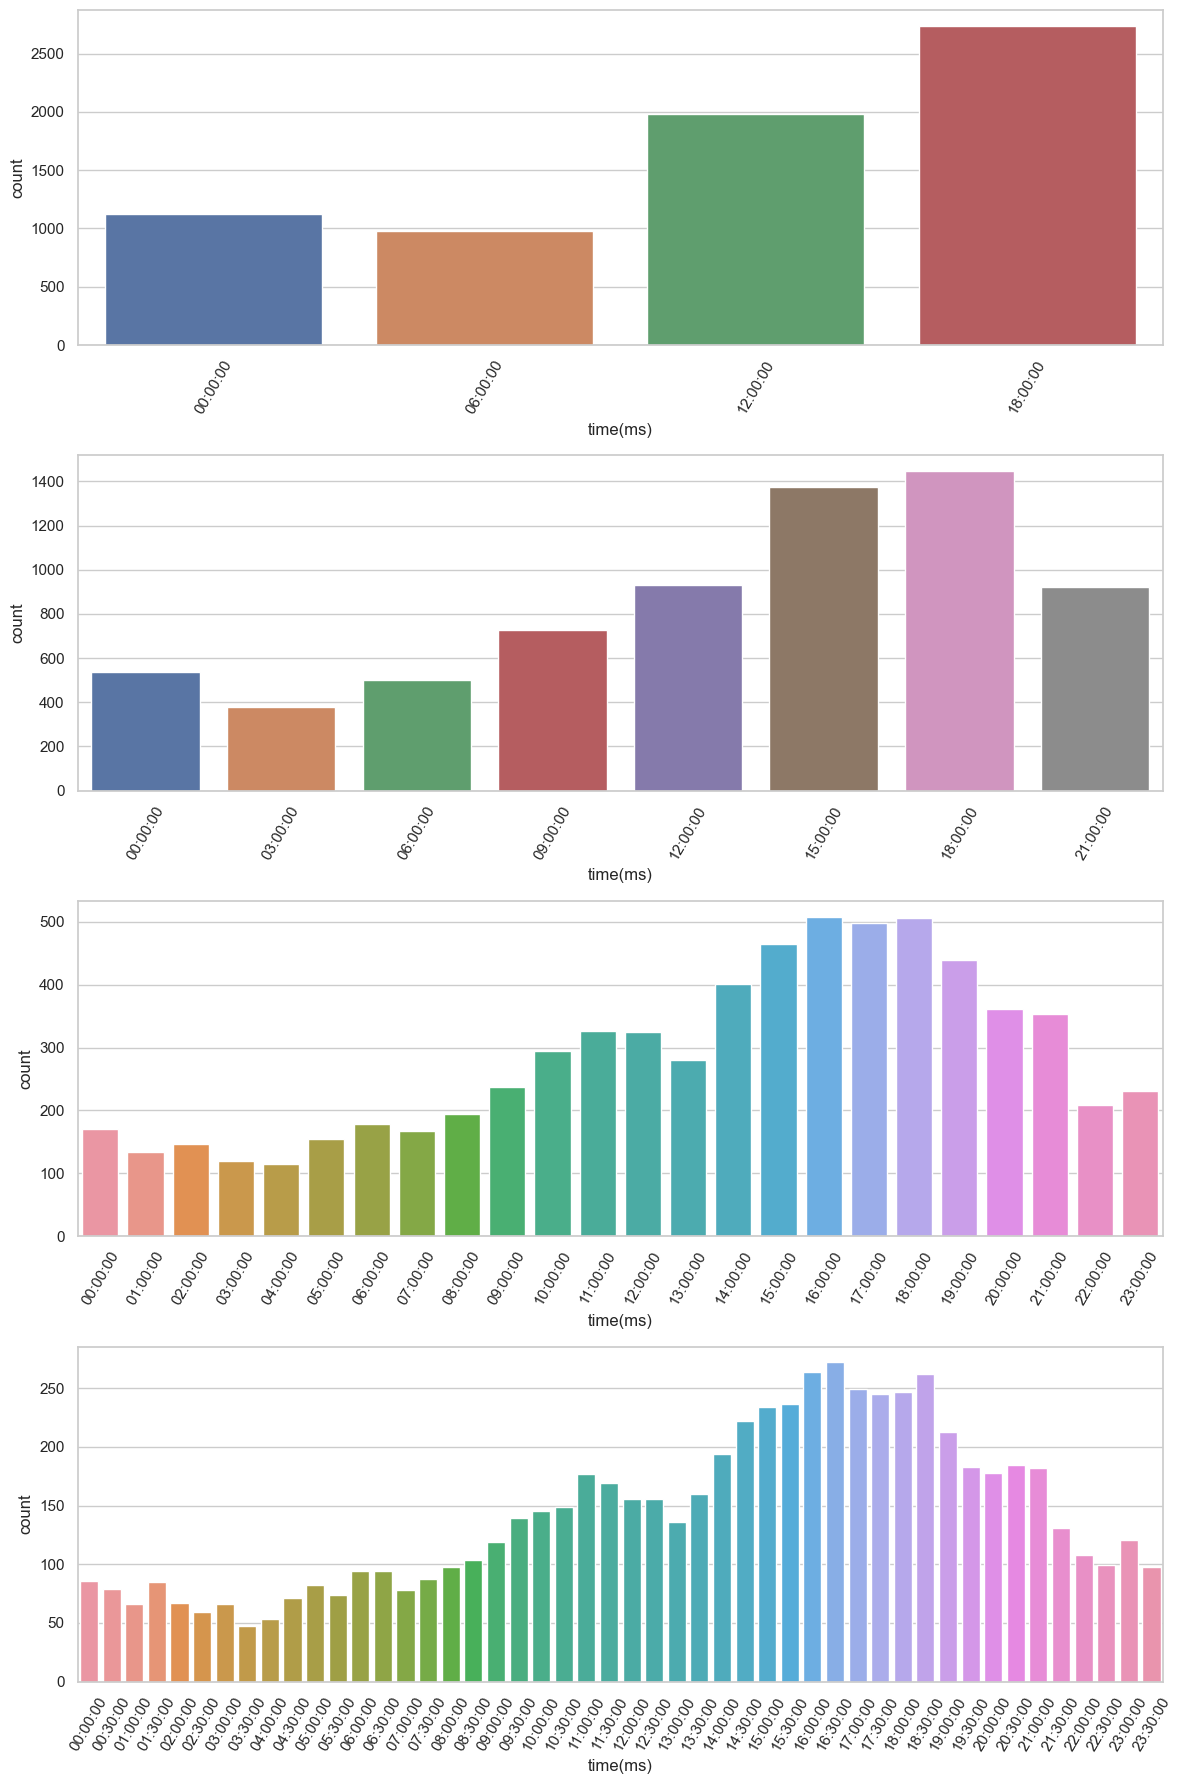

In [248]:
fig, axes = plt.subplots(4, 1, figsize = (12, 18))

axes = axes.flatten()
round_time = ["6H", "3H", "1H", "30min"]
for r_time, ax in zip(round_time, axes):
    log_df["time(ms)"] = log_df["timestamp(ms)"].dt.round(r_time)
    log_df["time(ms)"] = log_df["time(ms)"].dt.time
    log_df.sort_values("time(ms)", inplace = True)
    ax.tick_params(axis='x', labelrotation=60)
    sns.countplot(x = log_df["time(ms)"], ax = ax)

fig.tight_layout()

* It's clear that the most popular time is somewhere between 2pm and 7pm(will be probably around 4pm or 6pm)

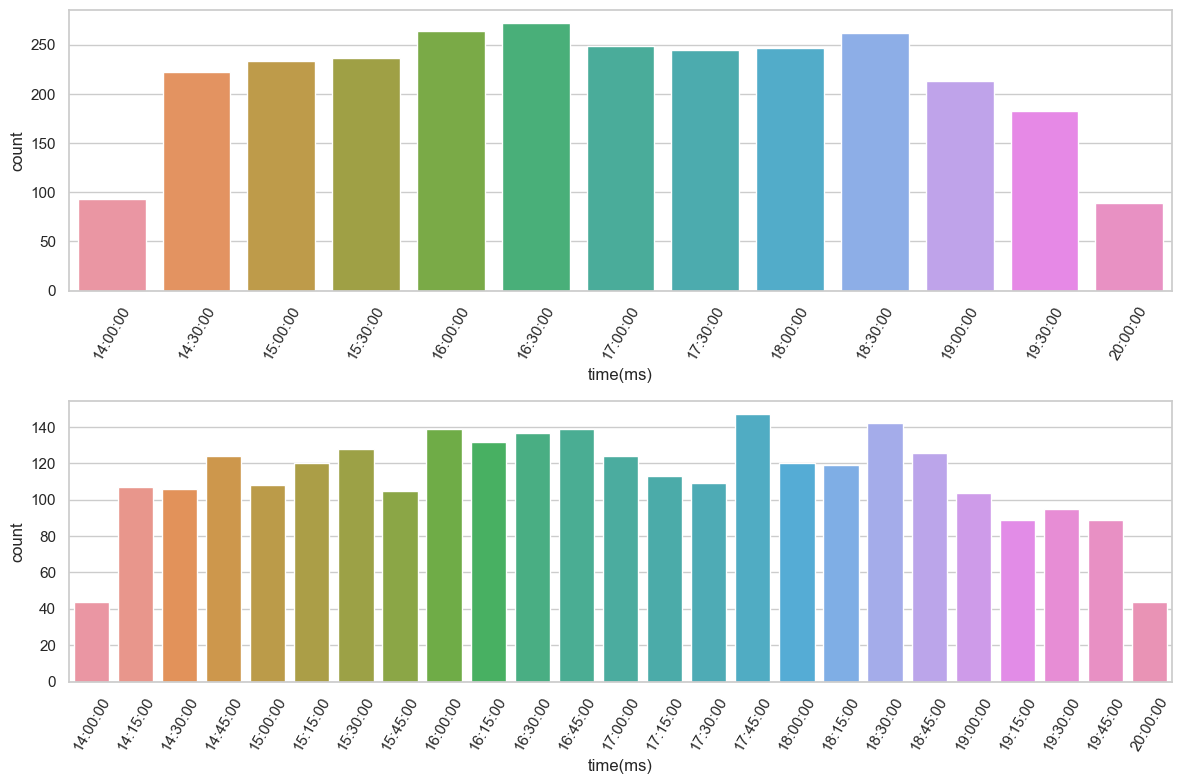

In [249]:
pm2_to_pm7_df = log_df[(log_df["timestamp(ms)"].dt.hour >= 14) & (log_df["timestamp(ms)"].dt.hour <= 19)].copy(deep=True)

fig, axes = plt.subplots(2, 1, figsize = (12, 8))

axes = axes.flatten()
round_time = ["30min", "15min"]
for r_time, ax in zip(round_time, axes):
    pm2_to_pm7_df["time(ms)"] = pm2_to_pm7_df["timestamp(ms)"].dt.round(r_time)
    pm2_to_pm7_df["time(ms)"] = pm2_to_pm7_df["time(ms)"].dt.time
    pm2_to_pm7_df.sort_values("time(ms)", inplace = True)
    ax.tick_params(axis='x', labelrotation=60)
    sns.countplot(x = pm2_to_pm7_df["time(ms)"], ax = ax)

fig.tight_layout()

* The most popular time to listen to music comes out to be around 4pm.

### <a id = "1-3.b">1.3.b Rank of Songs by Popularity : Total Plays Across the Dataset</a>
* We will calculate most popular songs based on the number of times they have been played.

In [250]:
log_df.reset_index(drop = True, inplace = True)

In [251]:
log_df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,timestamp(ms),time(ms)
0,Devendra Banhart,Logged In,Layla,F,84,Griffin,134.76526,paid,"Lake Havasu City-Kingman, AZ",PUT,NextSong,1.541057e+12,984,At The Hop,200,1543448795796,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",24,2018-11-28 23:46:35.796,00:00:00
1,Great Lake Swimmers,Logged In,Kevin,M,0,Arellano,215.11791,free,"Harrisburg-Carlisle, PA",PUT,NextSong,1.540007e+12,815,Your Rocky Spine,200,1542931645796,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",66,2018-11-23 00:07:25.796,00:00:00
2,Tim O'brien,Logged In,Lily,F,39,Koch,176.14322,paid,"Chicago-Naperville-Elgin, IL-IN-WI",PUT,NextSong,1.541048e+12,818,Think About Last Night,200,1542845350796,"""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...",15,2018-11-22 00:09:10.796,00:00:00
3,Ben Jelen,Logged In,Lily,F,35,Koch,226.55955,paid,"Chicago-Naperville-Elgin, IL-IN-WI",PUT,NextSong,1.541048e+12,818,Come On (Album Version),200,1542844202796,"""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...",15,2018-11-21 23:50:02.796,00:00:00
4,3 Doors Down,Logged In,Lily,F,36,Koch,237.13914,paid,"Chicago-Naperville-Elgin, IL-IN-WI",PUT,NextSong,1.541048e+12,818,Here Without You,200,1542844428796,"""Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...",15,2018-11-21 23:53:48.796,00:00:00


* This is one way of calculating popularity, total time a song is played.

In [252]:
log_df["song"].value_counts()

You're The One                                                         37
Undo                                                                   28
Revelry                                                                27
Sehr kosmisch                                                          21
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    19
                                                                       ..
Be Your Own Girl                                                        1
You Were The King_ Now You're Unconscious (Album Version)               1
On Its Way Out                                                          1
Secret Loser                                                            1
Stairway To The Stars                                                   1
Name: song, Length: 5189, dtype: int64

###  <a id="1-3-c">1.3.c Rank of artist by popularity : Total Unique Plays</a>

* We will measure popularity of artist by calulating unique playes : counting one play maximum out of all the times it was played by that person.

In [253]:
log_df["artist"].value_counts() #This is with duplicate plays

Coldplay                    58
Kings Of Leon               55
Dwight Yoakam               38
The Black Keys              36
Florence + The Machine      35
                            ..
I Set My Friends On Fire     1
Guildo Horn                  1
Hummersqueal                 1
En Vogue                     1
Natalie Cole                 1
Name: artist, Length: 3148, dtype: int64

In [254]:
log_df.drop_duplicates(["song", "userId"])["artist"].value_counts() #Now we will count one play per userId

Coldplay                53
Kings Of Leon           38
The Black Keys          36
Jack Johnson            34
Muse                    33
                        ..
Bunbury                  1
Thievery Corporation     1
Aaron Shust              1
Michael Bolton           1
Natalie Cole             1
Name: artist, Length: 3146, dtype: int64

### <a id="1-3-d"> 1.3.d Most popular artist/song per user</a>

* #### if two songs are identical in number of plays, the more popular one is the one that has a longer song length because it means longer app-engagement
* #### if two artists are identical, give preference to the artist that has fewer total songs released

In [255]:
# log_df.groupby(["artist"]).apply(lambda sub_df : sub_df["song"].nunique()).reset_index().rename(columns = {0 : "total-songs"}).sort_values("total-songs", ascending=False).reset_index(drop=True)
# log_df.groupby(["artist"]).apply(lambda sub_df : sub_df["song"].nunique()) #This calculates unique_songs for each artist

* Let's create ```song_duration_df``` which will have artist, song and duration of song as columns. This will be helpful later in breaking the tie among the  most popular songs

In [256]:
song_duration_df = log_df.drop_duplicates(["artist", "song", "length"]).reset_index(drop = True)[["artist", "song", "length"]]
song_duration_df

,artist,song,length
0,Devendra Banhart,At The Hop,134.76526
1,Great Lake Swimmers,Your Rocky Spine,215.11791
2,Tim O'brien,Think About Last Night,176.14322
3,Ben Jelen,Come On (Album Version),226.55955
4,3 Doors Down,Here Without You,237.13914
...,...,...,...
5319,The Mamas & The Papas,Dream A Little Dream Of Me,190.58893
5320,be your own PET,Food Fight!,66.87302
5321,Vader,Fight Fire With Fire,245.86404
5322,Placebo,The Bitter End,190.61506


* Let's create ```artist_song_df``` which will have artist, unique-songs(total unique songs by that artist) as columns. This will be helpful later in breaking the tie among the most popular artists

In [257]:
artist_song_df = log_df.groupby("artist")["song"].nunique().reset_index().rename(columns = {"song" : "unique-songs"})
artist_song_df.head()

,artist,unique-songs
0,!!!,1
1,'N Sync/Phil Collins,1
2,+ / - {Plus/Minus},1
3,+44,1
4,1 Mile North,1


In [258]:
def get_popular_song(sub_df, song_duration_df = song_duration_df):
    """Function to get the most popular-song for given sub_df
    Inputs:
    sub_df : <pd.DataFrame> : This dataframe has data for only one particular userId.
    song_duration_df : <pd.DataFrame> : This dataframe has artist-song-length columns
    
    Returns:
    successful : song <str>
    failed : None
    """

    #sub_df has data for one user-Id only hence we can calculate results over full sub_df.

    try:
        #Calculating count of each song for each artist
        per_song_count = sub_df.groupby(["artist", "song"]).count()[["auth"]].rename(columns = {"auth" : "count"}).reset_index()

        #Selecting songs with max count only.(There can be more than 1 song in max_played_songs)
        max_played_songs = per_song_count[per_song_count["count"] == per_song_count["count"].max()]

        #Left Merging on song_duration_df to get duration of most played songs.
        max_played_songs = pd.merge(left = max_played_songs, right = song_duration_df, how = "left")

        #Sorting songs on reverse order of their length
        max_played_song = max_played_songs.sort_values(by = ["count", "length"], ascending = False).head(1)
        
        #Selecting song with highest lenght
        return max_played_song["song"].values[0]
    except:
        print("popular function failed...")
    # return pd.Series(data = [max_played_song["song"].values[0], max_played_song["artist"].values[0]], index = ["most-popular-song", "most-poular-song-artist"])


def get_popular_artist(sub_df):
    """Function to get the most popular-artist for given sub_df
    Inputs:
    sub_df : <pd.DataFrame> : This dataframe has data for only one particular userId.
    
    Returns:
    successful : artist <str>
    failed : None"""

    #sub_df has data for one user-Id only hence we can calculate results over full sub_df.

    #Calculating count(songs) for each artist
    per_artist_count = sub_df.groupby(["artist"]).count()[["auth"]].rename(columns = {"auth" : "count"}).reset_index()

    #Calculating maximum times played artists(there can be more than one artists)
    max_played_artists = per_artist_count[per_artist_count["count"] == per_artist_count["count"].max()]

    #Left Merging with artist_song_df to get unique-songs for each artist in max_played_artists
    max_played_artists = pd.merge(left = max_played_artists, right = artist_song_df, how = "left")

    #Sorting in descending order of unique-songs again to break the tie
    max_played_artist = max_played_artists.sort_values(by = ["count", "unique-songs"], ascending= False).head(1)

    #Picking up the artist at the top of the table
    return max_played_artist["artist"].values[0]
    # return pd.Series(data = [max_played_artist["artist"].values[0], max_played_artist["unique-songs"].values[0]], index = ["most-popular-artist", "artist-songs"])
    

def popular_song_artist(sub_df):
    """Function to calculate most-popular-song and most-popular-artist for each userId"""
    sub_song = get_popular_song(sub_df)
    sub_artist = get_popular_artist(sub_df)

    __sub_df = pd.DataFrame({"most-popular-song" : [sub_song], "most-popular-artist" : [sub_artist]})
    return __sub_df


In [259]:
# log_df[log_df["userId"].isin(["10"])].groupby("userId").apply(popular_song_artist).reset_index()

In [260]:
songs_artists_per_user = log_df.groupby("userId").apply(popular_song_artist).reset_index().drop(columns=["level_1"])
songs_artists_per_user.head()

,userId,most-popular-song,most-popular-artist
0,10,Greece 2000,John Mayer
1,100,Fairy Tale,Linkin Park
2,101,Windows,Radiohead
3,11,Rehab,Shakira
4,12,Automatik,BeyoncÃÂ©


In [261]:
os.makedirs(os.path.join("results"), exist_ok=True)
songs_artists_per_user.to_csv(os.path.join("results", "most_popular_song_artists_per_user.csv"), index=False)